<a href="https://colab.research.google.com/github/LocoBunny04/ACMP2000-Data-ML/blob/main/Kawinthida_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# let's load back the standardized housing dataset we created in 02-Toolbox-Part3
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

housing_standard = pd.read_csv('gdrive/MyDrive/Colab Notebooks/housing.csv')
housing_standard.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
# Gathering datset with no geographical coordinates
housing_minus_coords = housing_standard.copy()
housing_minus_coords = housing_minus_coords.drop(["longitude", "latitude"], axis=1)
housing_minus_coords.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Identifying and Handling Missing Data

In [35]:
# this will give us missing data directly
housing_minus_coords.isnull().sum()

,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [51]:
# calculate the median
median = housing_minus_coords["total_bedrooms"].median()

# create dataset with fixed dataset

option3 = housing_minus_coords.copy()
# Use the median to replace missing values in 'total_bedrooms'
option3["total_bedrooms"].fillna(median, inplace=True)


# Use the existing option3 dataset for clustering
housing_minus_coords = option3.copy()
housing_minus_coords.head()


/tmp/ipython-input-3563237900.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  option3["total_bedrooms"].fillna(median, inplace=True)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


K-Means

In [53]:
from sklearn.cluster import KMeans


# we create an instance of K-Means with three clusters, setting the random
# number generator seed to a fixed number for reproducibility
kmeans = KMeans(n_clusters=4, random_state=1, n_init="auto")

kmeans.fit(housing_minus_coords)

# Adding the labels to the housing_minus_coords dataframe
# copies the housing_minus_coords_numeric dataframe and names it to appropiate cluster
house_min_coords_cl = housing_minus_coords.copy()
# adds a new column called "cl_labels" to the house_min_coords_cl DataFrame.
# This column contains the cluster assignments for each data point, as determined by the KMeans model (kmeans.labels_).
house_min_coords_cl.loc[:, "cl_labels"] = kmeans.labels_

house_min_coords_cl.head()



,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cl_labels
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


Loading Orginal dataset

In [55]:
housing_standard['cluster'] = kmeans.labels_

# Display the head of the modified dataframe to verify
display(housing_standard.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


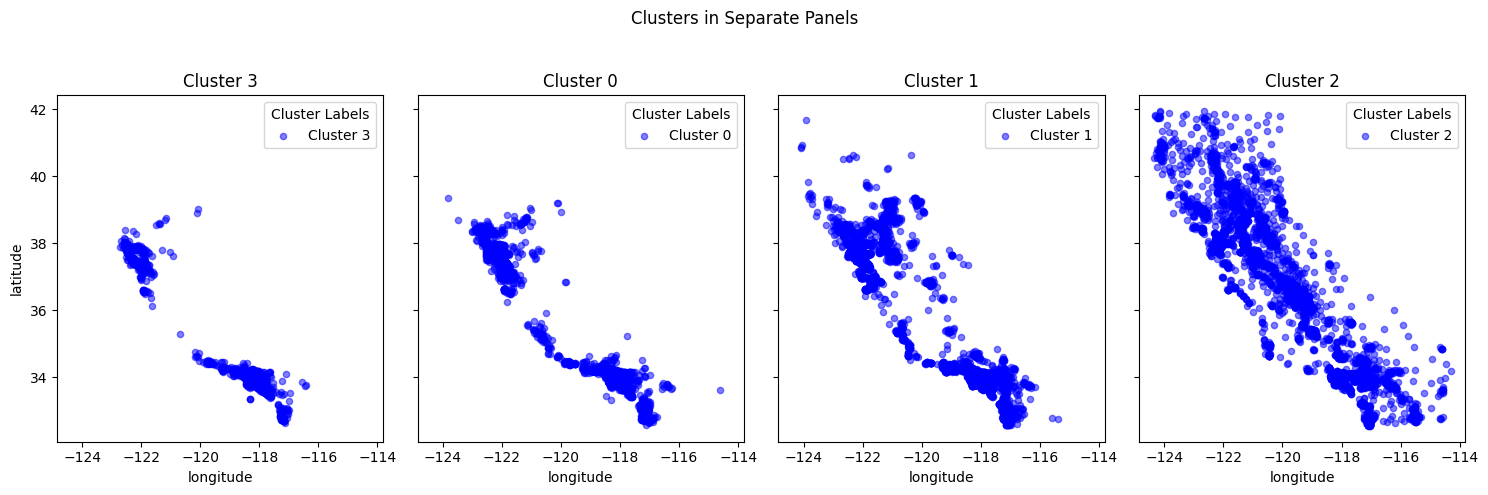

In [58]:
import matplotlib.pyplot as plt

# Get the number of unique clusters
num_clusters = len(housing_standard["cluster"].unique())

# Create subplots with one subplot per cluster
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5), sharex=True,
                         sharey=True)

# If there's only one cluster, axes won't be a list, so we handle that case
if num_clusters == 1:
    axes = [axes]

# Plot each cluster in its own subplot
for i, cluster_label in enumerate(housing_standard["cluster"].unique()):
    cluster_data = housing_standard[housing_standard["cluster"] == cluster_label]
    cluster_data.plot(kind="scatter", x="longitude", y="latitude",
                      alpha=0.5, label=f"Cluster {cluster_label}", ax=axes[i],
                      color="blue")
    axes[i].set_title(f"Cluster {cluster_label}")
    axes[i].legend(title="Cluster Labels")

# Add a main title and show plot
plt.suptitle("Clusters in Separate Panels")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for title
plt.show()